In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
df = pd.read_csv("../data/references/miniGWG_darth/shear100/sheared_bayes.txt", sep="\t", header=None)
df.head()

/export/scratch/miniconda3/envs/analysis_SHOGUN/lib/python3.5/site-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/grad00/hillm096/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


,0,1,2,3,4,5,6,7,8,9
0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0,1,48,20,12,241,2,92971,93299
1,k__Bacteria;p__Deinococcus-Thermus;c__Deinococ...,25,0,0,0,0,25,0,88888,89027
2,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0,20,45,41,29,928,0,124865,125928
3,k__Bacteria;p__Firmicutes;c__Erysipelotrichia;...,56,837,0,0,304,2,0,94217,96069
4,k__Viruses;p__ssRNA_viruses;c__;o__;f__Virgavi...,0,0,0,0,0,0,0,129,129


In [2]:
uniqueness_rate_per_level = np.zeros(8, dtype=float)
for i in range(1, 9):
    # Sum all of the columns
    colsums = df[i].sum()
    # Take the sum of those columns
    num_hits = colsums.sum()
    # Total number of possible hits
    total_hits = df[9].sum()
    # Uniqueness Rate
    uniqueness_rate_per_level[i-1] = num_hits/total_hits
levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
display(list(zip(levels, uniqueness_rate_per_level)))

[('kingdom', 0.00024427088981178973),
 ('phylum', 0.00045203286459036219),
 ('class', 0.00037099261803100767),
 ('order', 0.0013770542337594339),
 ('family', 0.0045528001044508127),
 ('genus', 0.010950355120068945),
 ('species', 0.0039106679441064454),
 ('strain', 0.87604409173555464)]

In [3]:
# Sum all of the columns
colsums = df.iloc[:,1:9].sum()
# Take the sum of those columns
num_hits = colsums.sum()
# Total number of possible hits
total_hits = df[9].sum()
# Uniqueness Rate
num_hits/total_hits

0.89790226551037344

The kmer size is too large. For this experiment, we sheared 100 bps with a step size of 50. They just aren't unique enough at the strain level. Almost .87% of these reads are unique at the strain level. If we look at all levels, the uniqueness gets distributed only to 89%, with the highest uniquness being at the genus level with 1%.

Is it feasible for use to decrease the size of the kmers to 32bps? Or maybe even to 16bps?

In [4]:
# Get the size of the files
files_in_darth = !ls -alh "../data/references/miniGWG_darth/"
display(files_in_darth)

['total 34G',
 'drwxrwx--- 4 hillm096 knightslab  401 Jul  3 13:05 .',
 'drwxrwx--- 6 hillm096 knightslab  139 Jun 30 10:46 ..',
 '-rw-r----- 1 hillm096 knightslab 7.6G Jul  3 12:19 miniGWG_darth_15.but',
 '-rw-r----- 1 hillm096 knightslab 1.3M Jul  3 12:19 miniGWG_darth_15.but.log',
 '-rw-r----- 1 hillm096 knightslab  13G Jul  2 08:45 miniGWG_darth_15.fna',
 '-rw-r----- 1 hillm096 knightslab 7.9G Jun 22 16:23 miniGWG_darth_15.gg.utr',
 '-rw-r----- 1 hillm096 knightslab 1.5M Jun 22 16:23 miniGWG_darth_15.gg.utr.gg.log',
 '-rw-r----- 1 hillm096 knightslab  24M Jun 22 15:06 miniGWG_darth_15.tax',
 'lrwxrwxrwx 1 hillm096 knightslab   40 Apr 25 17:45 miniGWG_darth.acx -> /project/flatiron2/sop/miniGWG_darth.acx',
 'lrwxrwxrwx 1 hillm096 knightslab   40 Apr 25 17:45 miniGWG_darth.edx -> /project/flatiron2/sop/miniGWG_darth.edx',
 '-rw-r----- 1 hillm096 knightslab  16M Jun 22 15:09 miniGWG_darth.tax',
 'drwxr-x--- 2 hillm096 knightslab  496 Jun 30 10:47 shear100',
 'drwxr-x--- 2 hillm096 kni

So it would be ~200GB sheared file with a 32bps and 16bps sliding window. Is this feasible with embalmer?

In [5]:
df_32 = pd.read_csv("../data/references/miniGWG_darth/shear32/sheared_bayes.txt", sep="\t", header=None)
uniqueness_rate_per_level = np.zeros(8, dtype=float)
for i in range(1, 9):
    # Sum all of the columns
    colsums = df_32[i].sum()
    # Take the sum of those columns
    num_hits = colsums.sum()
    # Total number of possible hits
    total_hits = df_32[9].sum()
    # Uniqueness Rate
    uniqueness_rate_per_level[i-1] = num_hits/total_hits
levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
display(list(zip(levels, uniqueness_rate_per_level)))

[('kingdom', 0.0013420657585268855),
 ('phylum', 0.0011408068226012689),
 ('class', 0.001393227253969136),
 ('order', 0.001940149641640013),
 ('family', 0.0064696347476648252),
 ('genus', 0.014771946859077095),
 ('species', 0.0041695190973051882),
 ('strain', 0.68654350753079096)]

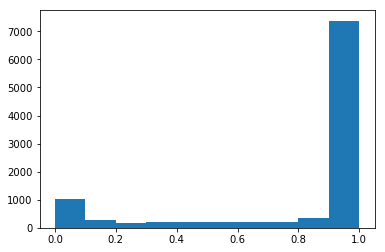

In [6]:
# Distribution of uniqueness
plt.hist(df_32[8]/df_32[9])
plt.show()

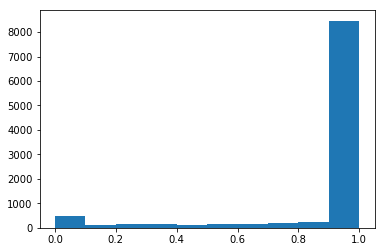

In [7]:
plt.hist(df[8]/df[9])
plt.show()

In [8]:
low_uniqueness = df[df[8]/df[9] <= .01]
low_uniqueness[0]

14       k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...
17       k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
25       k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
27       k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
30       k__Bacteria;p__Proteobacteria;c__Betaproteobac...
37       k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
38       k__Bacteria;p__Proteobacteria;c__Deltaproteoba...
44       k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
50       k__Bacteria;p__Firmicutes;c__Clostridia;o__The...
63       k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
70       k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
100      k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
107      k__Bacteria;p__Proteobacteria;c__Betaproteobac...
125      k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
131      k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...
137      k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...
139      k__Bacteria;p__Actinobacteria;c__Actinobacteri.

In [9]:
from collections import Counter
kingdom_freq_hi = Counter([_.split(';')[0] for _ in df[0]])
kingdom_freq_low = Counter([_.split(';')[0] for _ in low_uniqueness[0]])
print(kingdom_freq_hi)
print(kingdom_freq_low)
for key, value in kingdom_freq_hi.items():
    print("%s\t%f" % (key, kingdom_freq_low[key]/np.float(value)))

Counter({'k__Viruses': 7131, 'k__Bacteria': 2903, 'k__Archaea': 161, 'k__Viroids': 46})
Counter({'k__Bacteria': 264, 'k__Viruses': 62, 'k__Archaea': 7})
k__Archaea	0.043478
k__Bacteria	0.090940
k__Viruses	0.008694
k__Viroids	0.000000


In [10]:
# Sum all of the columns
colsums = df_32.iloc[:,1:9].sum()
# Take the sum of those columns
num_hits = colsums.sum()
# Total number of possible hits
total_hits = df_32[9].sum()
# Uniqueness Rate
num_hits/total_hits

0.71777085771157545

In [11]:
# hits_dict = defaultdict(list)
# with open("../data/references/miniGWG_darth/shear32/embalmer_align.b6") as inf:
#     csv_inf = csv.reader(inf, delimiter="\t")
#     for row in csv_inf:
#         if 't__' in row[-1]:
#             hits_dict[row[-1]].append(int(row[8]))

# with open("./hits_dict.keys", "w") as outf:
#     for key, value in hits_dict.items():

In [12]:
#len(list(hits_dict.keys()))

In [13]:
#darth = pd.read_csv("../data/references/miniGWG_darth/shear100/embalmer_otutable.fixed.txt", sep="\t", index_col=0)

In [25]:
import csv
# with open("../data/references/miniGWG_darth/shear100/embalmer_otutable.fixed.txt") as inf:
#     csv_inf = csv.reader(inf, delimiter="\t")
#     columns = next(csv_inf)
#     columns = dict(zip(columns[1:], range(len(columns))))
#     indptr = [0]
#     indices = np.array([], dtype=int)
#     data = np.array([], dtype=int)
#     names = []
#     for ix, row in enumerate(csv_inf):
#         if ix % 1000 == 0:
#             print(ix)
#         names.append(row[0])
#         np_row = np.array(row[1:], dtype=int)
#         temp_indx = [np_row > 0]
#         data = np.concatenate((data, np_row[temp_indx]))
#         indices = np.concatenate((indices, np.where(temp_indx)[1]))
#         indptr.append(indices.shape[0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000


In [30]:
from scipy.sparse import csr_matrix
# csr = csr_matrix((data, indices, indptr), dtype=int)

def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((  loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

# save_sparse_csr("../data/references/miniGWG_darth/shear100/embalmer_otutable.fixed.npz", csr)

In [67]:
# load csr
with open("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.txt") as inf:
    csv_inf = csv.reader(inf, delimiter="\t")
    columns = next(csv_inf)
    columns = dict(zip(columns[1:], range(len(columns))))
    indptr = [0]
    indices = np.array([], dtype=int)
    data = np.array([], dtype=int)
    names = []
    for ix, row in enumerate(csv_inf):
        if ix % 1000 == 0:
            print(ix)
        names.append(row[0])
        np_row = np.array(row[1:], dtype=int)
        temp_indx = [np_row > 0]
        data = np.concatenate((data, np_row[temp_indx]))
        indices = np.concatenate((indices, np.where(temp_indx)[1]))
        indptr.append(indices.shape[0])

taxatable_csr = csr_matrix((data, indices, indptr), dtype=int)
save_sparse_csr("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.npz", taxatable_csr)
np.savez("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.rows.npz", np.array(names))
np.savez("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.columns.npz", np.array(sorted(columns, key=columns.get)))

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [155]:
csr = load_sparse_csr("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.npz")
rows = np.load("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.rows.npz")['arr_0']
rows_dict = dict(zip(rows, range(len(rows))))
columns = np.load("../data/references/miniGWG_darth/shear100/embalmer_taxatable.fixed.columns.npz")['arr_0']
columns_dict = dict(zip(columns, range(len(columns))))

In [156]:
print(csr.shape)

(12098, 100880)


In [207]:
np.sum(csr[rows_dict['k__Bacteria']])

4435

In [158]:
df.shape

(10241, 10)

In [134]:
# Sum all of the columns
colsums = df.iloc[:,1:9].sum()
# Take the sum of those columns
num_hits = colsums.sum()
# Total number of possible hits
total_hits = df[9].sum()
# Uniqueness Rate
np.sum(csr)

272730016

In [260]:
unique_count = np.zeros(8)
for row, name in zip(csr, rows):
    level = name.count(';')
    unique_count[level] += np.sum(row)
    
print(np.sum(csr, axis=1).mean())

22543.3969251


In [261]:
unique_count.sum()

272730016.0

In [262]:
levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
display(list(zip(levels, unique_count/np.sum(unique_count))))

[('kingdom', 0.00059829131532042291),
 ('phylum', 0.00055417075911439102),
 ('class', 0.00032945401946516951),
 ('order', 0.0012051552110787834),
 ('family', 0.0046517285431464939),
 ('genus', 0.0083225309531019861),
 ('species', 0.37079631161683357),
 ('strain', 0.6135423575819392)]

In [263]:
# Load up the accession2taxonomy
with open("../data/references/miniGWG_darth/miniGWG_darth.tax") as inf:
    csv_inf = csv.reader(inf, delimiter='\t')
    name2taxonomy = dict(csv_inf)
# Transpose to be samples by indices
csr = csr.T

In [264]:
# Build the BayesMat
tax2index = np.unique(list(name2taxonomy.values()))
bayes_mat = np.zeros((tax2index.shape[0], 9), dtype=int)
tax2index = dict(zip(tax2index, range(tax2index.shape[0])))
row_names = []
for key, value in columns_dict.items():
    key = key.split('.')
    key = key[0] + "_" + key[1] + "." + key[2]
    tax = name2taxonomy[key]
    values = csr.getrow(value)
    names = rows[values.indices]
    row_names.append(tax)
    for name, value in zip(names, values.data):
        if not name is "":
            bayes_mat[tax2index[tax], name.count(';')] += value
    bayes_mat[tax2index[tax], 8] += np.sum(values)

In [265]:
df_emb_100 = pd.DataFrame(bayes_mat, index=sorted(tax2index, key=tax2index.get))

In [266]:
df_emb_100.iloc[:, 8].sum()

272730016

In [267]:
uniqueness_rate_per_level = np.zeros(8, dtype=float)
for i in range(0, 8):
    # Take the sum of those columns
    num_hits =  df_emb_100.iloc[:, i].sum()
    # Total number of possible hits
    total_hits = df_emb_100.iloc[:, 8].sum()
    # Uniqueness Rate
    uniqueness_rate_per_level[i] = num_hits/total_hits
levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
display(list(zip(levels, uniqueness_rate_per_level)))

[('kingdom', 0.00059829131532042291),
 ('phylum', 0.00055417075911439102),
 ('class', 0.00032945401946516951),
 ('order', 0.0012051552110787834),
 ('family', 0.0046517285431464939),
 ('genus', 0.0083225309531019861),
 ('species', 0.37079631161683357),
 ('strain', 0.6135423575819392)]

In [268]:
read_counts_100 = pd.read_csv('../data/references/miniGWG_darth/shear100/sheared_read_counts.txt', sep="\t", header=None)

In [270]:
print(df.shape)
print(df_emb_100.shape)
df_emb_100.to_csv('../data/references/miniGWG_darth/shear100/sheared_bayes.fixed.txt', sep="\t", header=None)

(10241, 10)
(10635, 9)


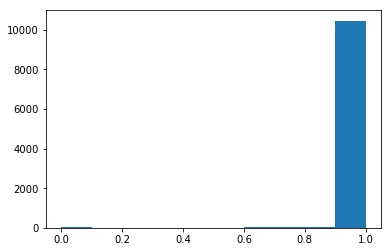

In [304]:
# Distribution of uniqueness
plt.hist(df_emb_100.iloc[:, 1:8].sum(axis=1)/df_emb_100[8])
plt.show()

In [301]:
low_uniqueness = df_emb_100[df_emb_100.iloc[:, :8].sum(axis=1)/df_emb_100[8] < .01]

kingdom_freq_low = Counter([_.split(';')[0] for _ in low_uniqueness.index])
kingdom_freq_all = Counter([_.split(';')[0] for _ in df_emb_100.index])
print(kingdom_freq_low)
print(kingdom_freq_all)
for key, value in kingdom_freq_all.items():
    print("%s\t%f" % (key, kingdom_freq_low[key]/np.float(value)))

Counter()
Counter({'k__Viruses': 7133, 'k__Bacteria': 3290, 'k__Archaea': 166, 'k__Viroids': 46})
k__Archaea	0.000000
k__Bacteria	0.000000
k__Viruses	0.000000
k__Viroids	0.000000
